In [3]:
# Importing modules.
import numpy as np
import pandas as pd

# Importing visualization modules.
import matplotlib.pyplot as plt
import seaborn as sb

# Importing Keras and Sklearn modules.
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score

In [5]:
# Using ImageDataGenerator.

# Using validation_split to get training and validation data.
train_img_gen = ImageDataGenerator(rescale = 1/255, 
                                   validation_split = 0.3)   # Train data.
test_img_gen = ImageDataGenerator(rescale = 1/255)           # Test data.

In [6]:
seed_ = np.random.seed(50)                                  # Assign seed value.
batch_size = 32                                             # Assign batch size.

# Importing and modifying the data from specified directories.

# Training data.
pizza_train_img = train_img_gen.flow_from_directory('train/', 
                                                    target_size = (28, 28),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = batch_size,
                                                    seed = seed_,
                                                    subset = 'training')

# Validation data.
pizza_val_img = train_img_gen.flow_from_directory('train/', 
                                                   target_size = (28, 28),
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                   batch_size = batch_size,
                                                   seed = seed_,
                                                   subset = 'validation')

Found 497 images belonging to 2 classes.
Found 212 images belonging to 2 classes.


In [7]:
# Print the class indices.
pizza_train_img.class_indices

{'Burnt_pizza': 0, 'Good_pizza': 1}

In [8]:
# Testing data.
pizza_test_img = test_img_gen.flow_from_directory('test/', 
                                                   target_size = (28, 28),
                                                   color_mode = 'rgb',
                                                   class_mode = None,
                                                   batch_size = batch_size,
                                                   seed = seed_, 
                                                   shuffle = False)

Found 40 images belonging to 1 classes.


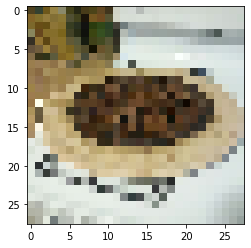

In [9]:
# Quick glance at the images.
plt.imshow(pizza_train_img[0][0][4])
plt.show()

In [10]:
# Importing modules.
from keras import Sequential
from keras.layers import Input, Flatten, Dense, BatchNormalization, Dropout
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.models import Model
from keras.initializers import GlorotUniform
from keras.regularizers import l2
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.metrics import BinaryAccuracy, Accuracy

In [12]:
# Model development.
input_shape = pizza_train_img[0][0][0].shape        # Input shape.
drop_rate = 0.3                                     # Dropout rate.
decay_rate = 0.1                                    # Decay rate.

def prepare_model(input_shape, drop_rate, decay_rate):
    '''This function returns the model.
       
       Input  - 1. Shape of the image.
                2. Drop out rate.
                3. Decay rate.
       Output - return the Model.
    '''
    model = Sequential()
    model.add(Flatten(input_shape = list(input_shape)))
    model.add(Dense(1024, activation = 'relu', name = 'Dense100',
                    kernel_initializer = GlorotUniform()))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))
    
    model.add(Dense(1024, activation = 'relu', name = 'Dense150',
                    kernel_initializer = GlorotUniform()))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))
    
    model.add(Dense(1024, activation = 'relu', name = 'Dense175',
                    kernel_initializer = GlorotUniform()))
    model.add(BatchNormalization())
    model.add(Dropout(drop_rate))
    
    model.add(Dense(1024, activation = 'relu', name = 'Dense200',
                    kernel_initializer = GlorotUniform()))
    model.add(BatchNormalization())
    
    model.add(Dense(2, activation = 'linear', name = 'Output'))
    
    return model

In [13]:
# Model1.
model1 = prepare_model(input_shape, drop_rate, decay_rate)

In [14]:
# Compiling the model.
model1.compile(loss = BinaryCrossentropy(from_logits = True),
               optimizer = Adam(),
               metrics = [BinaryAccuracy()])

In [15]:
# Using callbacks.
dlr = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, factor = 0.5)

In [16]:
# Defining steps required for each epoch.
steps_per_epoch = pizza_train_img.n//pizza_train_img.batch_size
val_steps = pizza_val_img.n//pizza_val_img.batch_size

# Running the model and saving results in history1.
history1 = model1.fit(pizza_train_img, steps_per_epoch = steps_per_epoch,
                      validation_data = pizza_val_img, validation_steps = val_steps,
                      epochs = 10, verbose = 2, callbacks = [dlr])

Epoch 1/10


C:\Users\praja\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
C:\Users\praja\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))


15/15 - 16s - loss: 0.6623 - binary_accuracy: 0.7667 - val_loss: 0.8565 - val_binary_accuracy: 0.6641
Epoch 2/10
15/15 - 12s - loss: 0.3855 - binary_accuracy: 0.8624 - val_loss: 3.4253 - val_binary_accuracy: 0.6328
Epoch 3/10
15/15 - 12s - loss: 0.2768 - binary_accuracy: 0.9031 - val_loss: 5.7712 - val_binary_accuracy: 0.5938
Epoch 4/10
15/15 - 12s - loss: 0.1850 - binary_accuracy: 0.9355 - val_loss: 3.8087 - val_binary_accuracy: 0.6458
Epoch 5/10
15/15 - 12s - loss: 0.1412 - binary_accuracy: 0.9473 - val_loss: 5.4759 - val_binary_accuracy: 0.6224
Epoch 6/10
15/15 - 13s - loss: 0.1109 - binary_accuracy: 0.9604 - val_loss: 1.2231 - val_binary_accuracy: 0.7760
Epoch 7/10
15/15 - 12s - loss: 0.0919 - binary_accuracy: 0.9667 - val_loss: 2.1308 - val_binary_accuracy: 0.7240
Epoch 8/10
15/15 - 12s - loss: 0.0604 - binary_accuracy: 0.9774 - val_loss: 1.2073 - val_binary_accuracy: 0.7604
Epoch 9/10
15/15 - 12s - loss: 0.0560 - binary_accuracy: 0.9720 - val_loss: 1.2997 - val_binary_accuracy: 0

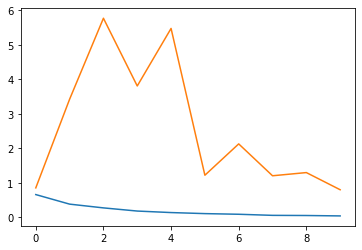

In [17]:
# Plotting the losses.
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.show()

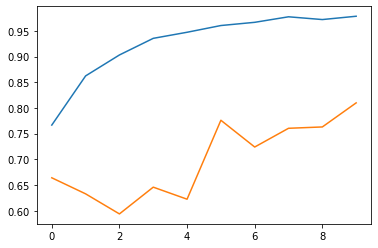

In [18]:
# Plotting the accuracies.
plt.plot(history1.history['binary_accuracy'])
plt.plot(history1.history['val_binary_accuracy'])
plt.show()

In [20]:
# Printing the final values.
print(history1.history['binary_accuracy'][-1])
print(history1.history['val_binary_accuracy'][-1])

0.9784946441650391
0.8098958134651184


In [22]:
# Predicting the values.
predict_val = model1.predict(pizza_test_img).argmax(axis = -1)

In [23]:
# Mapping the values.
pred = ['Burnt_pizza' if x == 0 else 'Good_pizza' for x in predict_val]

In [24]:
# Printing the predicted values.
pred

['Burnt_pizza',
 'Good_pizza',
 'Burnt_pizza',
 'Good_pizza',
 'Good_pizza',
 'Good_pizza',
 'Good_pizza',
 'Burnt_pizza',
 'Good_pizza',
 'Good_pizza',
 'Good_pizza',
 'Good_pizza',
 'Good_pizza',
 'Burnt_pizza',
 'Burnt_pizza',
 'Good_pizza',
 'Good_pizza',
 'Good_pizza',
 'Good_pizza',
 'Burnt_pizza',
 'Burnt_pizza',
 'Good_pizza',
 'Good_pizza',
 'Burnt_pizza',
 'Burnt_pizza',
 'Good_pizza',
 'Good_pizza',
 'Good_pizza',
 'Burnt_pizza',
 'Good_pizza',
 'Burnt_pizza',
 'Good_pizza',
 'Burnt_pizza',
 'Good_pizza',
 'Burnt_pizza',
 'Good_pizza',
 'Burnt_pizza',
 'Good_pizza',
 'Burnt_pizza',
 'Good_pizza']